In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel('NEDL_LASSO_Elastic_Net.xlsx',index_col='Date')[['Blackrock','SP500','Treasury bonds','Gold','Oil']].dropna()
df

,Blackrock,SP500,Treasury bonds,Gold,Oil
Date,,,,,
2016-11-23,372.989990,220.699997,120.639999,113.250000,14.000000
2016-11-25,373.670013,221.520004,120.82,112.610001,13.590000
2016-11-28,368.649994,220.479996,121.709999,113.800003,13.710000
2016-11-29,368.549988,220.910004,122.220001,113.269997,13.240000
2016-11-30,370.790009,220.380005,120.239998,111.750000,14.440000
...,...,...,...,...,...
2021-11-16,948.950012,469.279999,145.110001,172.919998,21.900000
2021-11-17,931.539978,468.140015,146.259995,174.500000,21.400000
2021-11-18,922.770020,469.730011,146.809998,173.940002,21.549999


In [3]:
#Moving parameters
rolling_windows_days=30
df['moving_average']=df.Blackrock.rolling(rolling_windows_days).mean()
df['moving_std_dev']=df.Blackrock.rolling(rolling_windows_days).std()

In [4]:
df['upper_band']=df.moving_average+1.5*df.moving_std_dev
df['lower_band']=df.moving_average-1.5*df.moving_std_dev

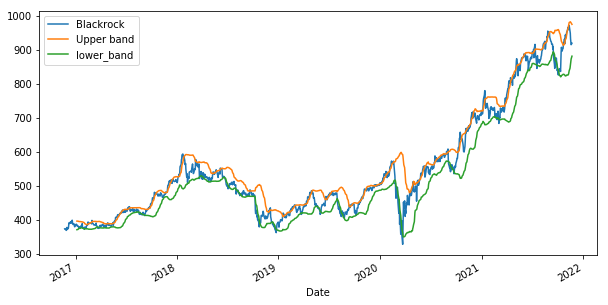

In [5]:
df.Blackrock.plot(label='Blackrock',figsize=(10,5))
df.upper_band.plot(label='Upper band')
df.lower_band.plot(label='lower_band')
plt.legend()
plt.show()

In [6]:
#Long Positions
df['Long_entry']=df.Blackrock < df.lower_band
df['Long_exit']=df.Blackrock >= df.lower_band
df['positions_long']=np.nan
df.loc[df.Long_entry,'positions_long']=-1
df.loc[df.Long_exit,'positions_long']=0
df.positions_long=df.positions_long.fillna(method='ffill')
df

,Blackrock,SP500,Treasury bonds,Gold,Oil,moving_average,moving_std_dev,upper_band,lower_band,Long_entry,Long_exit,positions_long
Date,,,,,,,,,,,,
2016-11-23,372.989990,220.699997,120.639999,113.250000,14.000000,NaN,NaN,NaN,NaN,False,False,NaN
2016-11-25,373.670013,221.520004,120.82,112.610001,13.590000,NaN,NaN,NaN,NaN,False,False,NaN
2016-11-28,368.649994,220.479996,121.709999,113.800003,13.710000,NaN,NaN,NaN,NaN,False,False,NaN
2016-11-29,368.549988,220.910004,122.220001,113.269997,13.240000,NaN,NaN,NaN,NaN,False,False,NaN
2016-11-30,370.790009,220.380005,120.239998,111.750000,14.440000,NaN,NaN,NaN,NaN,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-16,948.950012,469.279999,145.110001,172.919998,21.900000,917.198330,43.464715,982.395402,852.001257,False,True,0.0
2021-11-17,931.539978,468.140015,146.259995,174.500000,21.400000,920.331329,40.833394,981.581420,859.081239,False,True,0.0
2021-11-18,922.770020,469.730011,146.809998,173.940002,21.549999,923.011997,38.084702,980.139051,865.884944,False,True,0.0


In [7]:
#Short positions
df['short_entry']=df.Blackrock>df.upper_band
df['short_exit']=df.Blackrock<=df.upper_band
df['positions_short']=np.nan
df.loc[df.short_entry,'positions_short']=1
df.loc[df.short_exit,'positions_short']=0
df.positions_short=df.positions_short.fillna(method='ffill')
df

,Blackrock,SP500,Treasury bonds,Gold,Oil,moving_average,moving_std_dev,upper_band,lower_band,Long_entry,Long_exit,positions_long,short_entry,short_exit,positions_short
Date,,,,,,,,,,,,,,,
2016-11-23,372.989990,220.699997,120.639999,113.250000,14.000000,NaN,NaN,NaN,NaN,False,False,NaN,False,False,NaN
2016-11-25,373.670013,221.520004,120.82,112.610001,13.590000,NaN,NaN,NaN,NaN,False,False,NaN,False,False,NaN
2016-11-28,368.649994,220.479996,121.709999,113.800003,13.710000,NaN,NaN,NaN,NaN,False,False,NaN,False,False,NaN
2016-11-29,368.549988,220.910004,122.220001,113.269997,13.240000,NaN,NaN,NaN,NaN,False,False,NaN,False,False,NaN
2016-11-30,370.790009,220.380005,120.239998,111.750000,14.440000,NaN,NaN,NaN,NaN,False,False,NaN,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-16,948.950012,469.279999,145.110001,172.919998,21.900000,917.198330,43.464715,982.395402,852.001257,False,True,0.0,False,True,0.0
2021-11-17,931.539978,468.140015,146.259995,174.500000,21.400000,920.331329,40.833394,981.581420,859.081239,False,True,0.0,False,True,0.0
2021-11-18,922.770020,469.730011,146.809998,173.940002,21.549999,923.011997,38.084702,980.139051,865.884944,False,True,0.0,False,True,0.0


In [8]:
df[df['positions_short']==1]['positions_short']

Date
2017-02-13    1.0
2017-02-15    1.0
2017-02-16    1.0
2017-02-17    1.0
2017-02-21    1.0
             ... 
2021-11-01    1.0
2021-11-02    1.0
2021-11-03    1.0
2021-11-04    1.0
2021-11-08    1.0
Name: positions_short, Length: 287, dtype: float64

In [9]:
df[df['positions_long']==-1]['positions_long']

Date
2017-02-01   -1.0
2017-02-02   -1.0
2017-03-21   -1.0
2017-03-22   -1.0
2017-03-23   -1.0
             ... 
2021-09-28   -1.0
2021-09-29   -1.0
2021-09-30   -1.0
2021-10-01   -1.0
2021-10-04   -1.0
Name: positions_long, Length: 132, dtype: float64

In [10]:
df['Blackrock'].pct_change().dropna()

Date
2016-11-25    0.001823
2016-11-28   -0.013434
2016-11-29   -0.000271
2016-11-30    0.006078
2016-12-01    0.017287
                ...   
2021-11-16   -0.004500
2021-11-17   -0.018347
2021-11-18   -0.009414
2021-11-19   -0.008474
2021-11-22    0.004787
Name: Blackrock, Length: 1257, dtype: float64

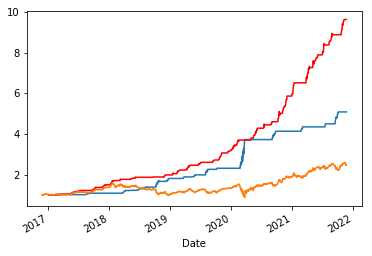

In [16]:
(1+df['positions_long']*df['Blackrock'].pct_change().dropna()).cumprod().plot()
(1+df['positions_short']*df['Blackrock'].pct_change().dropna()).cumprod().plot(color='r')
(1+df['Blackrock'].pct_change().dropna()).cumprod().plot()

In [12]:
x=(1+df['positions_long']*df['Blackrock'].pct_change().dropna()).cumprod()+(1+df['positions_short']*df['Blackrock'].pct_change().dropna())

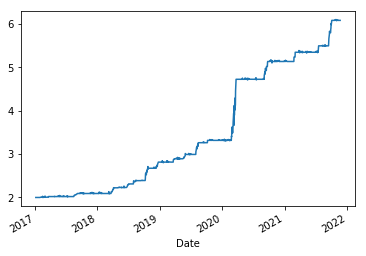

In [13]:
x.plot()